In [1]:
using Plots
using Distributions
plot();

# GeoBrown

In [2]:
N(μ=0, σ²=1,N::Int=1)=begin
    σ=√σ²
    n=round(Int,N/2)+1
    U₁=rand(n)
    U₂=rand(n)
    wyn=zeros(2*n)
    wyn[1:Int(end/2)]=sqrt.(-2*log.(U₁)).*sin.(2*π*U₂)
    wyn[Int(end/2)+1:end]=sqrt.(-2*log.(U₁)).*cos.(2*π*U₂)
    wyn[1:N]
end

N (generic function with 4 methods)

In [3]:
Brown(;Δ=0.01,times=100,n=1000) = begin
    [cumsum(N(0,1,n))*√Δ for i in 1:times]
end

Brown (generic function with 1 method)

In [24]:
GeoBrown(;S₀=100,σ=0.1,μ=0, Δ=0.01,times=100,n=1000) = begin
    S₀ .*[exp.((cumsum(μ.+N(0,1,n))*σ)*√Δ) for i in 1:times]
end

GeoBrown (generic function with 1 method)

In [67]:
μ=0.1
σ=0.1
times=20
Δ=0.01
T=10
n=round(Int,T/Δ)
S₀=100;

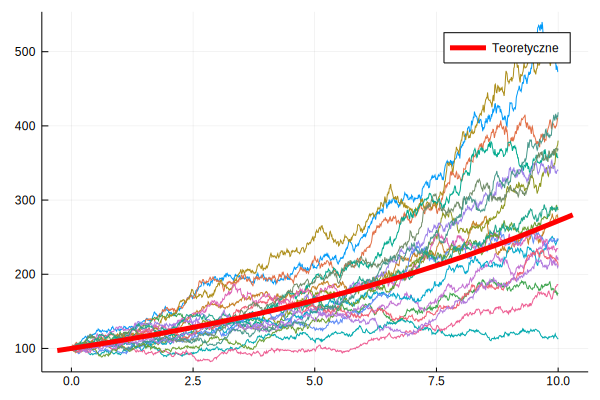

In [68]:
plot(Δ:Δ:T,GeoBrown(times=times,Δ=Δ,S₀=S₀,σ=σ,μ=μ, n=n),label="");
plot!(t->S₀*exp(μ*t), color=:red, linewidth=5, label="Teoretyczne")

In [69]:
plot(Brown(), leg=false);

In [70]:
𝔼(;S₀,σ,μ)=begin
    (t)->S₀*exp(μ*t+σ^2*t/2)
end

𝔼 (generic function with 1 method)

In [71]:
Var(;S₀,σ,μ)=begin
   (t)->S₀*exp(2*μ*t+2*σ^2*t)+S₀^2*exp(μ*t+σ^2*t/2)^2
end

Var (generic function with 1 method)

In [72]:
A=𝔼(S₀=S₀,σ=σ,μ=μ)

#81 (generic function with 1 method)

In [73]:
B=Var(S₀=S₀,σ=σ,μ=μ)

#84 (generic function with 1 method)

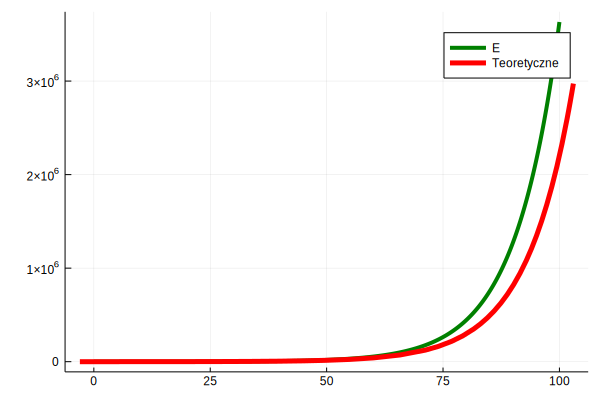

In [76]:
plot(0:0.01:100,t->A(t),label="E", color=:Green, linewidth=4)
plot!(t->S₀*exp(μ*t), color=:red, linewidth=5, label="Teoretyczne")

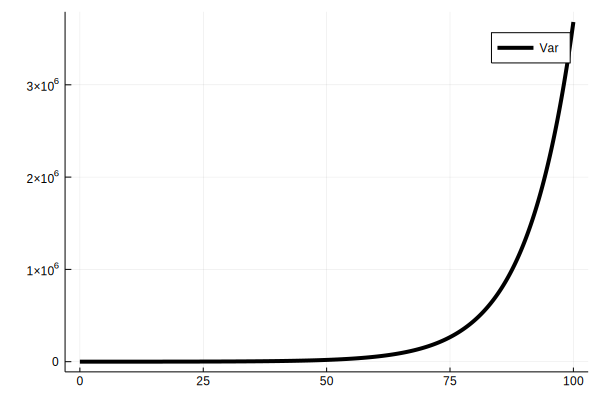

In [75]:
plot(0:0.01:100,t->√B(t),label="Var", color=:Black, linewidth=4)

# Balck - Scholesa

In [212]:
r=0.1
K=90

90

In [77]:
GeoBrown_r(;r=0.1,S₀=100,σ=0.1, Δ=0.01,times=100,n=1000) = begin
    S₀ .*[exp.((cumsum((r-σ^2/2).+N(0,1,n))*σ)*√Δ) for i in 1:times]
end

GeoBrown_r (generic function with 1 method)

In [79]:
f(x;K=90)=max(x-K,0)

f (generic function with 1 method)

In [197]:
M=1e4

10000.0

In [213]:
sum(f( GeoBrown_r(r=r,times=1,Δ=Δ,S₀=S₀,σ=σ, n=n)[1][end], K=K ) for i in 1:M)/M*exp(-r*T)

66.8203591914504

In [219]:
d(;T,K,S₀,σ,r)=begin
    d1=(log(S₀/K)+(r+σ^2/2)*T)/(σ*√T)
    d2=(log(S₀/K)+(r-σ^2/2)*T)/(σ*√T)
    S₀*cdf(Normal(),d1)-K*exp(-r*T)*cdf(Normal(),d2)
end

d (generic function with 1 method)

In [221]:
d(r=r,S₀=S₀,σ=σ, T=T, K=K)

66.89192180892093

In [240]:
r=0.1
K=73

73

In [242]:
sum(f( GeoBrown_r(r=r,times=1,Δ=Δ,S₀=S₀,σ=σ, n=n)[1][end], K=K ) for i in 1:M)/M*exp(-r*T)

72.59574953242249

In [241]:
d(r=r,S₀=S₀,σ=σ, T=T, K=K)

73.14485774116727

In [244]:
[d(r=0.1,S₀=100,σ=0.09, T=10, K=i) for i in 0:10:200]

21-element Vector{Float64}:
 100.0
  96.32120558828558
  92.64241117657116
  88.96361676485674
  85.2848223531551
  81.60602794403056
  77.92723365920168
  74.24844172045741
  70.5696727520218
  66.89104312428249
  63.213003398148444
  59.53685754281104
  55.86560640081062
  52.204996929455646
  48.56450402353509
  44.95792249709511
  41.40333188614273
  37.92236847242606
  34.53891785597457
  31.277464166371473
  28.16137350770566